# Wave signal and LP residual

In this notebook we will plot the wave signal and its LP residual for a sample audio.

## Importing required libraries

In [1]:
import sys
import librosa
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

sys.path.append('../')

from aux.reader import read_data
from residualphase import lp, lp_residual

Using TensorFlow backend.


## Loading data

In [ ]:
DATA_PATH = '../data/'
data_df = read_data(DATA_PATH)

In [ ]:
data_df.head()

The data files contained in data_df.path contain sample audio files representing a speech signal. <br>
We are going to printout sample length an sample rate for a single datafile.

In [ ]:
filename = data_df.path[1021]

samples, sample_rate = librosa.load('../data/' + filename)

print('sample length = {}, sample rate = {}'.format(len(samples), sample_rate))

## Speech signal and LP residual

To deconvolve the given speech into excitation and vocal tract system components, inverse filtering method based on Linear Prediction (LP) analysis is used. <br>
Inverse filtering of a speech signal removes the excitation source contribution from the speech signal, that are primary excitation to the vocal tract system. The result signal is known as a Linear prediction (LP) and its error is known as LP residual. <br>

To calculate the LP and LP residual signals, we use the functions contsined in '../../residualphase.py'.

/Users/alessandro/projects/coding/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


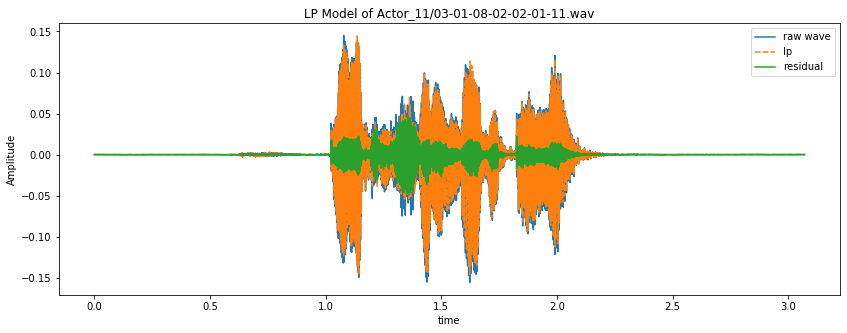

In [7]:
lp = lp(samples)
r = lp_residual(samples)

# calculate time from sample rate
t = np.linspace(0, len(samples) / sample_rate, num=len(samples))

plt.figure(figsize=(14, 5))
plt.plot(t, samples ,label='raw wave')
plt.plot(t, lp, linestyle='--', label='lp')
plt.plot(t, r , linestyle='-', label='residual')
plt.title('LP Model of ' + filename)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In green we observe the LP residual calculated as difference between the raw signal and the LP singal. <br> 

Note that the LP residual shows higher vlaues outside the voiced range. For this reason, trimming between start and end of the voiced signal may help to avoid residual signal artifact.

### Trim signals

In [8]:
samples , trim_range = librosa.effects.trim(samples, top_db=30)
a, b = trim_range
res_phase = res_phase[a:b]
lp = lp[a:b]
r = r[a:b]
t = t[a:b]

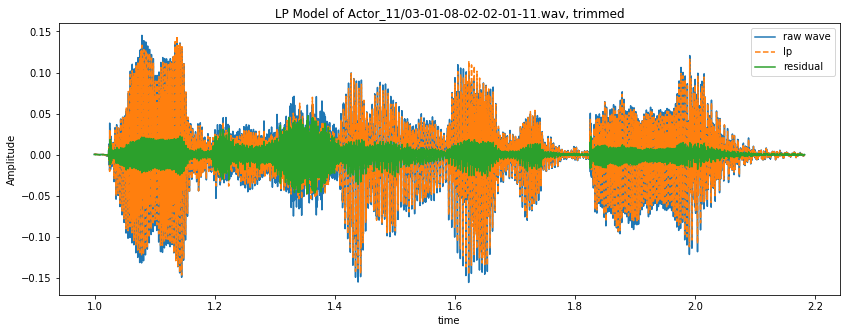

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(t, samples ,label='raw wave')
plt.plot(t, lp, linestyle='--', label='lp')
plt.plot(t, r , linestyle='-', label='residual')
plt.title('LP Model of ' + filename + ', trimmed')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()